In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Exploring the data

In [71]:
!ls

cleaned_gdp_data.csv	      test_cleaned_gdp.csv	train_transformed_gdp.csv
cleaned_gdp_df_countries.csv  test_transformed_gdp.csv	transformed_gdp_data.csv
sample_data		      train_cleaned_gdp.csv	transformed_gdp_df_countries.csv


In [72]:
cleaned_gdp_df = pd.read_csv('cleaned_gdp_data.csv')
transformed_gdp_df = pd.read_csv('transformed_gdp_data.csv')

In [73]:
cleaned_gdp_df.head()

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,15.399,15.192,17.984,19.083,23.032,25.297,26.361,27.795,29.532,31.436
1,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,171.673,145.656,163.138,195.060,224.107,239.209,247.742,255.315,259.347,262.804
2,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,84.516,57.139,74.861,122.781,93.796,92.925,96.895,100.785,106.430,111.822
3,Antigua and Barbuda,0.131,0.148,0.164,0.182,0.208,0.241,0.290,0.337,0.399,...,1.675,1.416,1.561,1.758,1.949,2.114,2.256,2.367,2.483,2.605
4,Argentina,233.696,189.802,94.250,116.267,130.544,98.599,118.565,121.561,142.386,...,451.815,389.064,487.377,630.606,621.833,632.629,635.908,660.282,695.286,728.054


In [74]:
transformed_gdp_df.tail()

,"GDP, current prices (Billions of U.S. dollars)",2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
167,Middle East and Central Asia,7.30,7.29,7.34,7.43,7.52,7.55,7.65,7.61,7.65,...,7.71,7.72,7.67,7.65,7.62,7.61,7.61,7.53,7.53,7.65
168,Other advanced economies,8.10,8.10,8.11,8.12,8.14,8.14,8.11,8.09,8.12,...,8.14,8.14,8.12,8.12,8.13,8.12,8.12,8.13,8.12,8.10
169,Sub-Saharan Africa,6.65,6.70,6.77,6.83,6.90,6.90,6.94,6.95,7.00,...,7.06,7.09,7.04,6.97,6.98,7.00,7.02,6.99,6.96,6.99
170,World,9.99,9.99,9.99,9.99,9.99,9.99,9.99,9.99,9.99,...,9.99,9.99,9.99,9.99,9.99,9.99,9.99,9.99,9.99,9.99
171,"©IMF, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
cleaned_gdp_df['country'] = cleaned_gdp_df.iloc[:, 0]
transformed_gdp_df['country'] = transformed_gdp_df.iloc[:, 0]

In [76]:
# cleaned_gdp_df.columns.values[0] = 'country'
# transformed_gdp_df.columns.values[0] = 'country'
cleaned_gdp_df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,country
0,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,15.192,17.984,19.083,23.032,25.297,26.361,27.795,29.532,31.436,Albania
1,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,145.656,163.138,195.060,224.107,239.209,247.742,255.315,259.347,262.804,Algeria
2,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,57.139,74.861,122.781,93.796,92.925,96.895,100.785,106.430,111.822,Angola
3,Antigua and Barbuda,0.131,0.148,0.164,0.182,0.208,0.241,0.290,0.337,0.399,...,1.416,1.561,1.758,1.949,2.114,2.256,2.367,2.483,2.605,Antigua and Barbuda
4,Argentina,233.696,189.802,94.250,116.267,130.544,98.599,118.565,121.561,142.386,...,389.064,487.377,630.606,621.833,632.629,635.908,660.282,695.286,728.054,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Middle East and Central Asia,527.714,588.285,581.559,591.099,599.786,617.744,626.892,743.168,780.507,...,3412.564,3995.072,4750.874,4698.168,4893.834,5168.551,5442.165,5743.487,6066.951,Middle East and Central Asia
168,Other advanced economies,775.274,790.860,785.664,784.097,821.924,819.463,999.432,1230.294,1450.500,...,7404.808,8568.574,8581.514,8800.731,9147.297,9605.214,10061.637,10511.283,10975.395,Other advanced economies
169,Sub-Saharan Africa,317.456,335.793,338.583,311.806,247.335,225.926,257.466,279.882,301.615,...,1672.529,1886.949,2013.032,1957.231,2084.818,2271.584,2458.237,2654.768,2875.895,Sub-Saharan Africa
170,World,11232.069,11526.241,11310.303,11610.283,12025.117,12553.732,14793.158,17032.786,19156.083,...,84960.903,96487.666,100135.361,104476.432,109734.270,115598.839,121580.994,127499.667,133782.888,World


In [77]:
list(cleaned_gdp_df.iloc[:, 0])

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 'Cyprus',
 "Côte d'Ivoire",
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Ko

In [78]:
not_countries = [
    'Africa (Region)',
    'Asia and Pacific',
    'Australia and New Zealand',
    'Caribbean',
    'Central America',
    'Central Asia and the Caucasus',
    'East Asia',
    'Eastern Europe ',
    'Europe',
    'Middle East (Region)',
    'North Africa',
    'North America',
    'Pacific Islands ',
    'South America',
    'South Asia',
    'Southeast Asia',
    'Sub-Saharan Africa (Region) ',
    'Western Europe',
    'Western Hemisphere (Region)',
    'ASEAN-5',
    'Advanced economies',
    'Emerging and Developing Asia',
    'Emerging and Developing Europe',
    'Emerging market and developing economies',
    'European Union',
    'Latin America and the Caribbean',
    'Major advanced economies (G7)',
    'Middle East and Central Asia',
    'Other advanced economies',
    'Sub-Saharan Africa',
    'World',
    '©IMF, 2023'
    ]

### Remove non-country rows

In [79]:
cleaned_gdp_df = cleaned_gdp_df[~cleaned_gdp_df.country.isin(not_countries)]
cleaned_gdp_df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,country
0,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,15.192,17.984,19.083,23.032,25.297,26.361,27.795,29.532,31.436,Albania
1,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,145.656,163.138,195.060,224.107,239.209,247.742,255.315,259.347,262.804,Algeria
2,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,57.139,74.861,122.781,93.796,92.925,96.895,100.785,106.430,111.822,Angola
3,Antigua and Barbuda,0.131,0.148,0.164,0.182,0.208,0.241,0.290,0.337,0.399,...,1.416,1.561,1.758,1.949,2.114,2.256,2.367,2.483,2.605,Antigua and Barbuda
4,Argentina,233.696,189.802,94.250,116.267,130.544,98.599,118.565,121.561,142.386,...,389.064,487.377,630.606,621.833,632.629,635.908,660.282,695.286,728.054,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,United States,2857.325,3207.025,3343.800,3634.025,4037.650,4339.000,4579.625,4855.250,5236.425,...,21060.450,23315.075,25462.725,26949.643,27966.553,29048.892,30223.881,31428.865,32690.373,United States
136,Uruguay,12.217,13.636,11.147,6.119,5.819,5.686,7.059,8.832,9.137,...,53.664,61.413,71.177,76.244,81.070,85.132,89.151,93.172,97.224,Uruguay
137,Vanuatu,0.121,0.114,0.114,0.117,0.144,0.132,0.128,0.139,0.158,...,1.008,0.942,1.073,1.166,1.263,1.357,1.440,1.527,1.611,Vanuatu
138,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,346.310,369.736,406.452,433.356,469.672,514.653,559.286,606.435,657.276,Vietnam


In [80]:
transformed_gdp_df = transformed_gdp_df[~transformed_gdp_df.country.isin(not_countries)]
transformed_gdp_df

,"GDP, current prices (Billions of U.S. dollars)",2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
0,Albania,3.13,3.17,3.27,3.29,3.36,3.37,3.45,3.45,3.34,...,3.31,3.23,3.23,3.26,3.34,3.41,3.40,3.37,3.41,Albania
1,Algeria,5.09,5.09,5.18,5.26,5.33,5.32,5.44,5.32,5.35,...,5.45,5.29,5.24,5.23,5.22,5.25,5.12,5.07,5.20,Algeria
2,Angola,4.09,4.06,4.18,4.47,4.72,4.76,4.93,4.80,4.84,...,5.15,5.01,4.88,4.99,4.80,4.71,4.41,4.47,4.84,Angola
3,Antigua and Barbuda,1.85,1.73,1.69,1.70,1.80,1.76,1.73,1.70,1.54,...,1.50,1.58,1.61,1.58,1.62,1.72,1.58,1.48,1.58,Antigua and Barbuda
4,Argentina,5.61,5.66,5.68,5.77,5.86,5.90,6.02,6.00,6.10,...,6.19,6.33,6.20,6.27,6.07,5.98,5.87,5.91,6.10,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,United States,9.10,9.04,9.00,8.99,8.98,8.92,8.86,8.89,8.84,...,8.83,8.90,8.91,8.89,8.89,8.92,8.92,8.89,8.94,United States
136,Uruguay,4.07,3.83,3.83,3.95,4.03,4.04,4.18,4.26,4.35,...,4.50,4.48,4.45,4.50,4.47,4.47,4.36,4.32,4.42,Uruguay
137,Vanuatu,0.99,0.96,0.97,0.96,1.05,1.04,1.07,1.14,1.10,...,1.13,1.13,1.13,1.19,1.20,1.27,1.32,1.09,1.20,Vanuatu
138,Vietnam,4.90,4.86,4.94,4.99,5.08,5.08,5.19,5.27,5.26,...,5.51,5.56,5.59,5.62,5.65,5.75,5.79,5.70,5.76,Vietnam


In [ ]:
cleaned_gdp_df = cleaned_gdp_df.iloc[:, 1:]
transformed_gdp_df = transformed_gdp_df.iloc[:, 1:]

### Write re-cleaned data to disk  

1. Removing non country rows
2. Renaming columns so they are easier to work with
3. Round GDP to nearest 100 million

In [58]:
# Rounding numeric columns to 1 decimal point
numeric_columns = cleaned_gdp_df.select_dtypes(include=[float])  # Select only the numeric columns
cleaned_gdp_df[numeric_columns.columns] = numeric_columns.round(1)

In [59]:
cleaned_gdp_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,country
0,1.9,2.2,2.3,2.3,2.3,2.3,2.6,2.6,2.5,2.8,...,15.2,18.0,19.1,23.0,25.3,26.4,27.8,29.5,31.4,Albania
1,42.3,44.4,44.8,47.5,51.5,61.1,61.5,63.3,51.7,52.6,...,145.7,163.1,195.1,224.1,239.2,247.7,255.3,259.3,262.8,Algeria
2,6.6,6.2,6.2,6.5,6.9,8.5,7.9,9.0,9.8,11.4,...,57.1,74.9,122.8,93.8,92.9,96.9,100.8,106.4,111.8,Angola
3,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.4,0.4,...,1.4,1.6,1.8,1.9,2.1,2.3,2.4,2.5,2.6,Antigua and Barbuda
4,233.7,189.8,94.2,116.3,130.5,98.6,118.6,121.6,142.4,91.4,...,389.1,487.4,630.6,621.8,632.6,635.9,660.3,695.3,728.1,Argentina


In [63]:
cleaned_gdp_df.to_csv('cleaned_gdp_df_countries.csv', index = False)
transformed_gdp_df.to_csv('transformed_gdp_df_countries.csv', index = False)

In [81]:
"x" + "abc"

'xabc'

### Split countries into train and validation and create datasets

In [34]:
random_seed = 325  # You can choose any integer as the seed
np.random.seed(random_seed)
train_size = len(cleaned_gdp_df) // 2 # 50-50 train test split
print("Random seed:", random_seed)
print("Countries in train set:", train_size)

Random seed: 325
Countries in train set: 70


In [40]:
all_countries = list(cleaned_gdp_df['country'])
train_countries = random.sample(all_countries, train_size)
test_countries = [country for country in all_countries if country not in train_countries]
print(train_countries)
print(test_countries)

['Niger', 'Ecuador', 'Denmark', 'Hungary', 'United States', 'Congo, Republic of ', 'Poland', 'Portugal', 'Puerto Rico', 'Luxembourg', 'Vietnam', 'Honduras', 'Morocco', 'Botswana', 'Kiribati', 'Bolivia', 'Tonga', 'Germany', 'Spain', 'Burkina Faso', 'Zambia', 'Austria', 'Barbados', 'Sudan', 'Tanzania', 'Algeria', 'New Zealand', 'Jordan', 'Thailand', 'Argentina', 'Congo, Dem. Rep. of the', 'India', 'Senegal', 'Japan', 'Samoa', 'Cabo Verde', 'United Kingdom', 'Burundi', 'Guyana', 'South Africa', 'Mali', 'Cyprus', 'Central African Republic', 'Saint Kitts and Nevis', 'Finland', 'Australia', 'Malta', 'Jamaica', 'Iran', 'São Tomé and Príncipe', 'Switzerland', 'Ghana', 'Colombia', 'Mexico', 'Madagascar', 'Oman', 'Korea, Republic of', 'France', 'Costa Rica', 'Malawi', 'Libya', 'Dominica', 'Malaysia', 'Israel', 'Taiwan Province of China', 'Uganda', 'Angola', 'Norway', 'Nepal', 'Egypt']
['Albania', 'Antigua and Barbuda', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Belgium', 'Belize', 'Benin', 'Bhuta

In [41]:
print(len(train_countries))
print(len(test_countries))

70
70


In [53]:
train_cleaned_gdp_df = cleaned_gdp_df[cleaned_gdp_df['country'].isin(train_countries)]
train_cleaned_gdp_df.to_csv('train_cleaned_gdp.csv', index = False)
print(train_cleaned_gdp_df.shape)

(70, 50)


In [54]:
test_cleaned_gdp_df = cleaned_gdp_df[cleaned_gdp_df['country'].isin(test_countries)]
test_cleaned_gdp_df.to_csv('test_cleaned_gdp.csv', index = False)
print(test_cleaned_gdp_df.shape)

(70, 50)


#### Transformed GDP

In [51]:
train_transformed_gdp_df = transformed_gdp_df[transformed_gdp_df['country'].isin(train_countries)]
train_transformed_gdp_df.to_csv('train_transformed_gdp.csv', index = False)
print(train_transformed_gdp_df.shape)

(70, 22)


In [52]:
test_transformed_gdp_df = transformed_gdp_df[transformed_gdp_df['country'].isin(test_countries)]
test_transformed_gdp_df.to_csv('test_transformed_gdp.csv', index = False)
print(test_transformed_gdp_df.shape)

(70, 22)


## Visualizations

### Single country - before and after transformation

In [ ]:
country_of_choice = 'India'

#### Before

In [ ]:
# before
plot_cleaned_gdp_df = cleaned_gdp_df[cleaned_gdp_df['country'] == country_of_choice]
plot_cleaned_gdp_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,country
62,189.438,196.535,203.537,222.049,215.556,237.618,252.751,283.75,299.645,301.234,...,2671.596,3150.307,3389.689,3732.224,4105.381,4511.847,4951.615,5427.392,5944.382,India


In [ ]:
country_melted_df = pd.melt(plot_cleaned_gdp_df, id_vars=['country'], var_name='year', value_name='gdp')
country_melted_df.head()

,country,year,gdp
0,India,1980,189.438
1,India,1981,196.535
2,India,1982,203.537
3,India,1983,222.049
4,India,1984,215.556


AttributeError: ignored

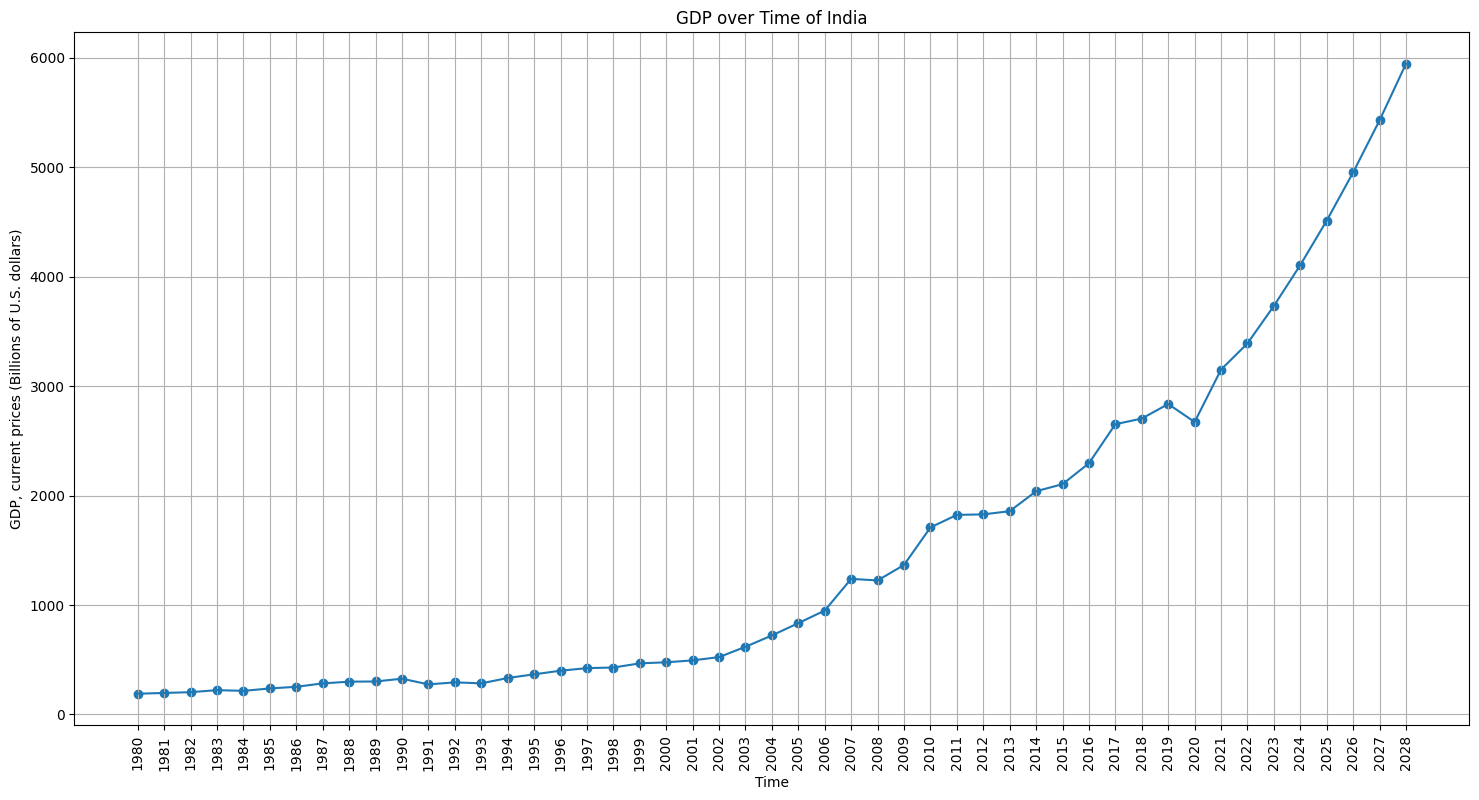

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(country_melted_df['year'], country_melted_df['gdp'])
plt.scatter(country_melted_df['year'], country_melted_df['gdp'])
plt.title(f'GDP over Time of {country_of_choice}')
plt.xlabel('Time')
plt.ylabel('GDP, current prices (Billions of U.S. dollars)')

# # Set the x-axis ticks to show every tenth value
# x_ = list(country_melted_df[['year']])
# x_ticks = x_[::2]
# print(x_ticks)
# plt.xticks(x_ticks)

plt.xticks(rotation=90)

# show a grid
plt.grid(True)
plt.figsave('gdpraw.png')

<Figure size 3600x1200 with 0 Axes>

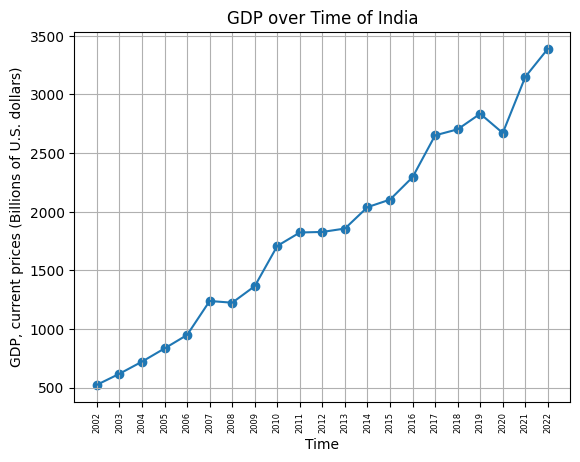

<Figure size 3600x1200 with 0 Axes>

In [ ]:
temp = country_melted_df[country_melted_df['year'].astype(int) >= 2002]
temp = temp[temp['year'].astype(int) <= 2022]

plt.plot(temp['year'], temp['gdp'])
plt.scatter(temp['year'], temp['gdp'])
plt.title(f'GDP over Time of {country_of_choice}')
plt.xlabel('Time')
plt.ylabel('GDP, current prices (Billions of U.S. dollars)')

# # Set the x-axis ticks to show every tenth value
# x_ = list(country_melted_df[['year']])
# x_ticks = x_[::2]
# print(x_ticks)
# plt.xticks(x_ticks)

plt.xticks(fontsize=6)
plt.xticks(rotation=90)

# show a grid
plt.grid(True)
plt.figure(figsize=(36, 12))

#### After

In [ ]:
# before
transformed_gdp_df = transformed_gdp_df[cleaned_gdp_df['country'] == country_of_choice]
transformed_gdp_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
62,6.78,6.79,6.82,6.87,6.93,7.03,6.95,7.08,7.17,7.13,...,7.18,7.24,7.29,7.36,7.33,7.38,7.35,7.35,7.39,India


In [ ]:
transformed_country_melted_df = pd.melt(transformed_gdp_df, id_vars=['country'], var_name='year', value_name='gdp')
transformed_country_melted_df.head()

,country,year,gdp
0,India,2002,6.78
1,India,2003,6.79
2,India,2004,6.82
3,India,2005,6.87
4,India,2006,6.93


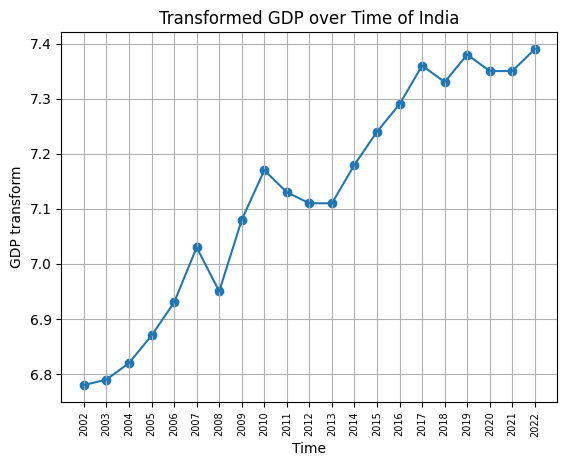

In [ ]:
plt.plot(transformed_country_melted_df['year'], transformed_country_melted_df['gdp'])
plt.scatter(transformed_country_melted_df['year'], transformed_country_melted_df['gdp'])
plt.title(f'Transformed GDP over Time of {country_of_choice}')
plt.xlabel('Time')
plt.ylabel('GDP transform')

# # Set the x-axis ticks to show every tenth value
# x_ = list(country_melted_df[['year']])
# x_ticks = x_[::2]
# print(x_ticks)
# plt.xticks(x_ticks)

plt.xticks(fontsize=7)
plt.xticks(rotation=90)

# show a grid
plt.grid(True)
plt.show()

In [68]:
cleaned_gdp_df.tail()

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
167,Middle East and Central Asia,527.714,588.285,581.559,591.099,599.786,617.744,626.892,743.168,780.507,...,3820.148,3412.564,3995.072,4750.874,4698.168,4893.834,5168.551,5442.165,5743.487,6066.951
168,Other advanced economies,775.274,790.860,785.664,784.097,821.924,819.463,999.432,1230.294,1450.500,...,7451.982,7404.808,8568.574,8581.514,8800.731,9147.297,9605.214,10061.637,10511.283,10975.395
169,Sub-Saharan Africa,317.456,335.793,338.583,311.806,247.335,225.926,257.466,279.882,301.615,...,1768.224,1672.529,1886.949,2013.032,1957.231,2084.818,2271.584,2458.237,2654.768,2875.895
170,World,11232.069,11526.241,11310.303,11610.283,12025.117,12553.732,14793.158,17032.786,19156.083,...,87325.540,84960.903,96487.666,100135.361,104476.432,109734.270,115598.839,121580.994,127499.667,133782.888
171,"©IMF, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
